# Data Augmentation
___
by Oliver Thomaschewski (Matrikelnummer) and Lisa-Marlen Wiegandt (572770)

## Link zur Präsentation

https://docs.google.com/presentation/d/1ynsTBfkaSOx5H7MoUForDk7t-b1NwtIKjco2gjHw7Zg/edit?usp=sharing

## Table of content
___
1. [What is data augmentation](#What-is-data-augmentation)
1. [Why use data augmentation](#why-use-data-augmentation)
    2. Challenges
    2. Use Cases
1. [Example: Image augmentation](#Image-augmentation)
    2. Simple transformations
    2. Advanced techniques
1. [Sources](#Sources)

## What is data augmentation
___
* artificially increase of data set
* synthesizing new data from given data
    * amount of data increased
    * diversity of data increased


## Why use data augmentation
___
* prediction accuracy based on amount and diversity of training data
* therefore improving prediction (best case)
* reducing cost of collecting and labeling data
* preventing data privacy problems
    
#### Challenges
* useful augmentation
* needs to analyze output quality of augmentation
* reproducing biases from original dataset  

#### Use Cases

* Small dataset for medical images, especially for rare diseases
* due to data privacy regulations data is not given

## Image augmentation
___
* simple alteration popular 
* or generation of new synthetic data with more advanced techniques

Some examples of data augmentation with torchvision.transforms

we start with one picture ##maybe htw picture ??????

In [2]:
from PIL import Image
import PIL
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch
import numpy as np
import torchvision.transforms as T


## Transformation Examples

In [ ]:
# Load Image

orig_img = Image.open(Path("images/flower.png"))
img_width, img_height = orig_img.size


### Grayscale

In [ ]:

gray_img = T.Grayscale()(orig_img)
gray_img

### Flip

In [ ]:
hflip_img = T.functional.hflip(orig_img)
vflip_img = T.functional.vflip(orig_img)

display(hflip_img, vflip_img)

### Translate


In [ ]:
translate_img = T.functional.affine(orig_img, angle = 0, translate=[100 ,40], scale=1, shear=0)
translate_img

### Rotate

In [ ]:
rotate_img = T.functional.rotate(orig_img, angle = 30.0, interpolation = T.InterpolationMode.BICUBIC,fill = 100)
rotate_img

### Random affine
    

In [ ]:
affine_img = T.RandomAffine(degrees=(30,70), translate=(0.1, 0.3), scale=(1, 1.5))(orig_img)

affine_img



### Center cropping

In [ ]:
crop_size = 200

crop_img = T.CenterCrop(crop_size)(orig_img)
crop_img = T.Resize(img_height)(crop_img)
crop_img

### Random Cropping

In [ ]:
rand_crop_img = T.RandomCrop(200)(orig_img)

rand_crop_img

### Add Gaussian Blur

In [ ]:
blurred_img = T.GaussianBlur(kernel_size=(33,33), sigma=(2, 2))(orig_img) 
blurred_img

### Perspective

In [ ]:
pers_img = T.RandomPerspective( p=1)(orig_img)
pers_img

### Elastic Transformation

In [ ]:
elastic_img = T.ElasticTransform(alpha= 100.0)(orig_img)
elastic_img

### ColorJitter 

In [ ]:
jitter_img = T.ColorJitter(brightness = 0.5, contrast=0.5, saturation=0.5, hue=0.5)(orig_img)
# HUE Sinnvoll?
jitter_img

### Random Augment  

In [ ]:
rand_img = T.RandAugment(num_ops=5)(orig_img)
rand_img

Compose

In [ ]:
transforms = T.Compose([
    T.CenterCrop(200),
    T.Grayscale(),
    T.Resize(img_width)
])

img = transforms(orig_img)
img

In [3]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_name, transform):
        self.data_name = data_name
        self.transform = transform

    def __len__(self):
        return 1

    def __getitem__(self, index):

        data = self.data_name[index]
        img = Image.open(Path(data))

        if self.transform:
            img = self.transform(img)

        return img

In [23]:
my_transformations = T.Compose([
    T.RandomGrayscale(0.5),
    T.RandomCrop(150),
    T.Resize(400)
])

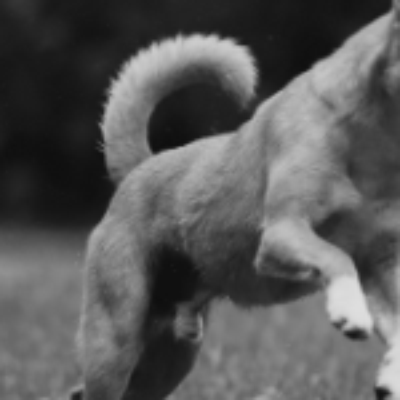

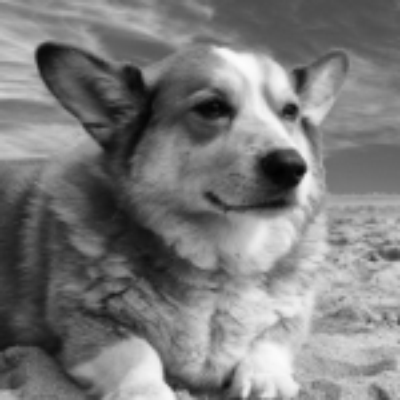

In [38]:
names =  ["test\dog2.png", "test\dog3.png"]
dataset = Dataset(names, my_transformations )

for img in dataset:
    display(img)

## Sources

first 
https://www.mygreatlearning.com/blog/understanding-data-augmentation/
https://research.aimultiple.com/data-augmentation/

second
https://snapstack.cz/data-augmentation-advantages-challenges-and-instances/
https://research.aimultiple.com/data-augmentation/

third
https://towardsdatascience.com/a-comprehensive-guide-to-image-augmentation-using-pytorch-fb162f2444be

mehr

https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/

Baseline Models:<br>
https://towardsdatascience.com/baseline-models-your-guide-for-model-building-1ec3aa244b8d <br>
https://towardsai.net/p/l/what-are-baseline-models-and-benchmarking-for-machine-learning-why-we-need-them

get_transforms in fastai

https://towardsdatascience.com/image-classification-baseline-model-for-2020-1d33f0986fc0

pytorch transformations:

https://pytorch.org/vision/stable/transforms.html

Always start stupid:

https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa